In [1]:
!pip install opencv-python


In [10]:
from google.colab import files

uploaded = files.upload()


Saving age_deploy.prototxt to age_deploy.prototxt
Saving age_net.caffemodel to age_net.caffemodel
Saving opencv_face_detector.pbtxt to opencv_face_detector.pbtxt
Saving opencv_face_detector_uint8.pb to opencv_face_detector_uint8.pb


In [5]:
import os

for file in uploaded.keys():
    print(file)


In [11]:
import cv2

# Use local paths after upload
age_proto = 'age_deploy.prototxt'
age_model = 'age_net.caffemodel'
face_proto = 'opencv_face_detector.pbtxt'
face_model = 'opencv_face_detector_uint8.pb'

# Load the models
age_net = cv2.dnn.readNetFromCaffe(age_proto, age_model)
face_net = cv2.dnn.readNet(face_model, face_proto)


In [12]:
import os
print(os.listdir())  # Show what files are available


['.config', 'age_net.caffemodel', '._age_net (1).caffemodel', '._opencv_face_detector.pbtxt', '._opencv_face_detector_uint8.pb', 'opencv_face_detector_uint8.pb', 'age_deploy.prototxt', '._age_net.caffemodel', 'opencv_face_detector.pbtxt', '._age_deploy (1).prototxt', '._age_deploy.prototxt', 'sample_data']


In [13]:
import cv2

# Load models using correct filenames
age_net = cv2.dnn.readNetFromCaffe('age_deploy.prototxt', 'age_net.caffemodel')
face_net = cv2.dnn.readNet('opencv_face_detector_uint8.pb', 'opencv_face_detector.pbtxt')

print("✅ Models loaded successfully!")


✅ Models loaded successfully!


In [15]:
from google.colab import files
uploaded = files.upload()


Saving Detecting age and gender girl1 - Copy.png to Detecting age and gender girl1 - Copy.png
Saving Detecting age and gender girl1.png to Detecting age and gender girl1.png
Saving Detecting age and gender girl2 - Copy.png to Detecting age and gender girl2 - Copy.png
Saving Detecting age and gender girl2.png to Detecting age and gender girl2.png
Saving Detecting age and gender kid1 - Copy.png to Detecting age and gender kid1 - Copy.png
Saving Detecting age and gender kid1.png to Detecting age and gender kid1.png
Saving Detecting age and gender kid2 - Copy.png to Detecting age and gender kid2 - Copy.png
Saving Detecting age and gender kid2.png to Detecting age and gender kid2.png
Saving Detecting age and gender man1 - Copy.png to Detecting age and gender man1 - Copy.png
Saving Detecting age and gender man1.png to Detecting age and gender man1.png
Saving Detecting age and gender man2 - Copy.png to Detecting age and gender man2 - Copy.png
Saving Detecting age and gender man2.png to Detect

In [16]:
import os
print(os.listdir())


['.config', 'age_net.caffemodel', 'Detecting age and gender man2.png', '._age_net (1).caffemodel', 'Detecting age and gender girl2 - Copy.png', 'Detecting age and gender girl2.png', '._opencv_face_detector.pbtxt', '._opencv_face_detector_uint8.pb', 'opencv_face_detector_uint8.pb', 'age_deploy.prototxt', 'Detecting age and gender girl1 - Copy.png', 'Detecting age and gender man1 - Copy.png', '._age_net.caffemodel', 'Detecting age and gender kid1 - Copy.png', 'Detecting age and gender man1.png', 'opencv_face_detector.pbtxt', 'Detecting age and gender kid1.png', 'Detecting age and gender kid2 - Copy.png', '._age_deploy (1).prototxt', 'Detecting age and gender kid2.png', '._age_deploy.prototxt', 'Detecting age and gender woman1.png', 'Detecting age and gender man2 - Copy.png', 'Detecting age and gender girl1.png', 'sample_data']


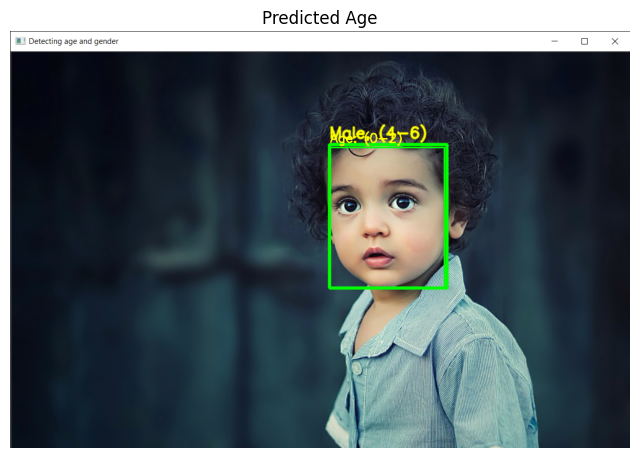

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Age categories
AGE_LIST = ['(0-2)', '(4-6)', '(8-12)', '(15-20)',
            '(25-32)', '(38-43)', '(48-53)', '(60-100)']
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

def get_face_box(net, frame, conf_threshold=0.7):
    h, w = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300),
                                 [104, 117, 123], swapRB=False, crop=False)
    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            bboxes.append(box.astype(int))
    return bboxes

# Load uploaded image (replace with your uploaded filename)
image_path = 'Detecting age and gender kid1.png'
frame = cv2.imread(image_path)
bboxes = get_face_box(face_net, frame)

# For each detected face
for box in bboxes:
    x1, y1, x2, y2 = box
    face = frame[y1:y2, x1:x2]
    blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),
                                 MODEL_MEAN_VALUES, swapRB=False)

    age_net.setInput(blob)
    age_preds = age_net.forward()
    age = AGE_LIST[age_preds[0].argmax()]
    label = f"Age: {age}"

    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(frame, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)

# Show result
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Predicted Age")
plt.show()


In [19]:
from google.colab import files
uploaded = files.upload()


Saving gender_deploy.prototxt to gender_deploy.prototxt
Saving gender_net.caffemodel to gender_net.caffemodel


In [20]:
import os
print(os.listdir())


['.config', 'age_net.caffemodel', 'Detecting age and gender man2.png', '._age_net (1).caffemodel', 'Detecting age and gender girl2 - Copy.png', 'Detecting age and gender girl2.png', '._opencv_face_detector.pbtxt', '._opencv_face_detector_uint8.pb', 'opencv_face_detector_uint8.pb', 'age_deploy.prototxt', 'Detecting age and gender girl1 - Copy.png', 'Detecting age and gender man1 - Copy.png', '._age_net.caffemodel', 'Detecting age and gender kid1 - Copy.png', 'Detecting age and gender man1.png', 'gender_net.caffemodel', 'opencv_face_detector.pbtxt', 'Detecting age and gender kid1.png', 'Detecting age and gender kid2 - Copy.png', '._age_deploy (1).prototxt', 'Detecting age and gender kid2.png', 'gender_deploy.prototxt', '._age_deploy.prototxt', 'Detecting age and gender woman1.png', 'Detecting age and gender man2 - Copy.png', 'Detecting age and gender girl1.png', 'sample_data']


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [22]:
# Load age and gender models
age_net = cv2.dnn.readNetFromCaffe('age_deploy.prototxt', 'age_net.caffemodel')
gender_net = cv2.dnn.readNetFromCaffe('gender_deploy.prototxt', 'gender_net.caffemodel')

# Load face detector
face_net = cv2.dnn.readNet('opencv_face_detector_uint8.pb', 'opencv_face_detector.pbtxt')

# Mean values for model input
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

# Age and gender labels
AGE_LIST = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)',
            '(38-43)', '(48-53)', '(60-100)']
GENDER_LIST = ['Male', 'Female']


In [23]:
def get_face_box(net, frame, conf_threshold=0.7):
    h, w = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300),
                                 [104, 117, 123], swapRB=False, crop=False)
    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            bboxes.append(box.astype(int))
    return bboxes


In [27]:
from google.colab import files
uploaded = files.upload()


Saving gender_age_img.jpg to gender_age_img.jpg


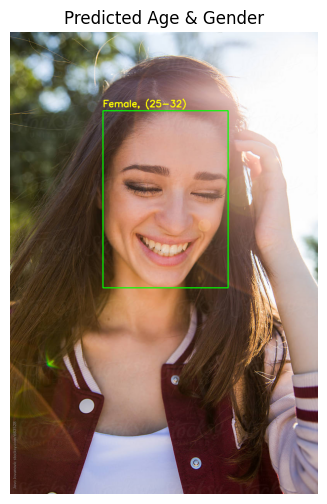

In [28]:
# Load image
image_path = 'gender_age_img.jpg'
frame = cv2.imread(image_path)
bboxes = get_face_box(face_net, frame)

# Loop through faces
for box in bboxes:
    x1, y1, x2, y2 = box
    face = frame[y1:y2, x1:x2]
    blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),
                                 MODEL_MEAN_VALUES, swapRB=False)

    # Predict gender
    gender_net.setInput(blob)
    gender_preds = gender_net.forward()
    gender = GENDER_LIST[gender_preds[0].argmax()]

    # Predict age
    age_net.setInput(blob)
    age_preds = age_net.forward()
    age = AGE_LIST[age_preds[0].argmax()]

    # Annotate
    label = f"{gender}, {age}"
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(frame, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)

# Show result
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Predicted Age & Gender")
plt.show()
